# Podstawy Analizy danych w Pythonie: pandas

## 11 stycznia 2020

Ostatnia cześć kursu Pythona będzie dotyczyć biblioteki **pandas**, która służy do analizy danych. Zacznijmy zatem od importu. Przeważnie bibliotekę skraca się do *pd*:

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

Pandas posiada dwie podstawowe struktury danych: 
 * szereg (Series),
 * ramka danych (DataFrame). 
 
Zaczniemy od szeregów. Szereg danych, mówiąc prościej jest to lista danych tego samego typu.

Żeby zobaczyć szeregi w akcji, stwórzmy listę losowych liczb:

In [3]:
losowe = np.random.randint(1, 20, 26)
print(losowe)

[ 4  5 10  9 13  7  7  4 19 13 13 10  2  3 17 18  3 14  4 19  5  6  9  5
 13 14]


A następnie stwórzmy szereg, korzystając z powyższych liczb:

In [4]:
dane = pd.Series(losowe)
print(dane)

0      4
1      5
2     10
3      9
4     13
5      7
6      7
7      4
8     19
9     13
10    13
11    10
12     2
13     3
14    17
15    18
16     3
17    14
18     4
19    19
20     5
21     6
22     9
23     5
24    13
25    14
dtype: int64


Czym różni się szereg od listy? Szereg danych posiada indeks, czyli klucz, dzięki ktoremu możemy zindetyfikować dane. Domyślnie, indeks jest ciągiem liczb zaczynających się od zera. Nie musi tak być, możemy podczas tworzenia przekazać również indeks:

In [5]:
dane2 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
print(dane2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


Jak można domyśleć się, indeks służy nam do uzyskania dostępu do danego elementu:

In [6]:
print(dane2['b'])

2


Więcej o dostępnie do danych będzie w dalszej części kursu.

Żeby uzyskać rozmiar danych możemy wykorzystać znaną już funkcję **len** lub wykorzystać polę **shape**.

In [7]:
print(len(dane))
print(dane.shape)

26
(26,)


Przeważnie zbiory danych, na których pracujemy są  duże. Stąd, próba ich wyświetlenia może okazać się karkołomna
lub nawet niemożliwa. Czasem chcemy tylko zobaczyć pogląd. Do tego służą dwie metody: **head** i **tail**, które
    zwrócą nam kilka pierwszych lub ostatnich wierszy z szeregu:

In [8]:
print(dane.head())

0     4
1     5
2    10
3     9
4    13
dtype: int64


In [9]:
print(dane.tail())

21     6
22     9
23     5
24    13
25    14
dtype: int64


Szeregi są dostosowane do analizy danych. Np. udostępniają prosty sposób do uzyskania podstawowych statystyk:

In [10]:
print("Średnia:", dane.mean())
print("Mediana:", dane.median())

Średnia: 9.461538461538462
Mediana: 9.0


Jak i inne przydatne funkcje:

In [30]:
print("Zbiór wartości:", dane.unique())
print("Zliczanie", dane.value_counts())

Zbiór wartości: [14  6 16  7 17 13 15  2 12  3  4  1  9 19  5]
Zliczanie 15    4
13    3
4     3
12    2
7     2
2     2
19    1
17    1
16    1
14    1
9     1
6     1
5     1
3     1
1     1
dtype: int64


Metoda ```value_counts``` zwraca nam szereg danych, który możemy wykorzystać do dalszych badań. Na przyklad, żeby wyświetlić 5 najczęściej występujących wartości, możemy napisać:

In [32]:
print(dane.value_counts().head())

15    4
13    3
4     3
12    2
7     2
dtype: int64


Żeby uzyskać wszystkie podstawowe statystyki, możmey wywołać metodę ```describe```:

In [33]:
print(dane.describe())

count    25.000000
mean      9.720000
std       5.556678
min       1.000000
25%       4.000000
50%      12.000000
75%      15.000000
max      19.000000
dtype: float64


A żeby wyświetlić je w postaci wykresu:

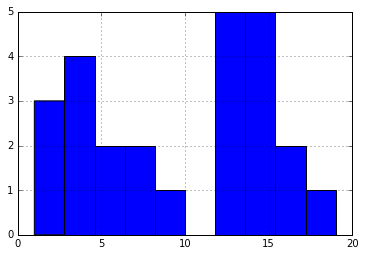

In [36]:
dane.hist()

(Dane zostały wygenerowane w sposób losowy, stąd ich analiza jak na razie jest pozbawiona sensu.)

## Indeksowanie, czyli dostęp do danych

Stwórzmy szereg danych, którego indeks będzie składać się z wielkich liter alfabetu:

In [46]:
import string
litery = list(string.ascii_uppercase)
dane3 = pd.Series(losowe, index=litery)
print(dane3.head())

A    11
B    13
C     6
D     9
E    18
dtype: int64


Najprostszym sposobem dostępu do danych jest przez indeks:

In [52]:
print(dane3['E'])

18


Szeregi udostępniają wiele więcej. Jeżeli chcemy zobaczyć przykłady o kluczach *P*, *Y*, *T*, to możemy podać listę indeksów jako argument:

In [53]:
print(dane3[['P', 'Y', 'T']])

P    12
Y     9
T     7
dtype: int64


Możemy również podać zakres danych:

In [57]:
print(dane3['B':'E'])

B    13
C     6
D     9
E    18
dtype: int64


Jeżeli zmienimy indeks szeregu, to cay czas mamy możliwość pracy na indeskach liczbowych:

In [58]:
print(dane3[2:5])

C     6
D     9
E    18
dtype: int64


## Mapowanie

Szeregi pozwalają zmieniać dane, które przechowują. Pojedyńcze wartości mozemy zmieniać przy pomocy odwołania się do konkretnego elementu:

In [62]:
dane3[2] = 777
print(dane3[2])

777


Jeżeli chcemy zmienić cały szereg przy pomocy funkcji, możemy wykorzystać metodę ```map```:

In [64]:
def cube(x):
    return x ** 3
print(dane3.map(cube))

A         1331
B         2197
C    469097433
D          729
E         5832
F         1000
G          343
H          512
I          125
J            8
K         3375
L         4096
M          216
N         5832
O          343
P         1728
Q         4913
R         1728
S         2197
T          343
U         4913
V         3375
W         2744
X         1331
Y          729
Z         4096
dtype: int64


*Uwaga:* w Pythonie istnieją funkcje lambda, które można tu wykorzystać.

## Ramki danych

Ramka danych jest odpowiednikiem tabeli znanej z R lub sqla. Patrząc z innego punktu widzenia, jest lista szeregóœ danych, które są połącząne z sobą wspólnym indeksem. Stwórzmy ramkę danych składających się z małych i wielkich liter:

In [68]:
wielkie = list(string.ascii_uppercase)
male = list(string.ascii_lowercase)
surowe = list(zip(male, wielkie))
print(surowe)

dane = pd.DataFrame(surowe)
print(dane)

[('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E'), ('f', 'F'), ('g', 'G'), ('h', 'H'), ('i', 'I'), ('j', 'J'), ('k', 'K'), ('l', 'L'), ('m', 'M'), ('n', 'N'), ('o', 'O'), ('p', 'P'), ('q', 'Q'), ('r', 'R'), ('s', 'S'), ('t', 'T'), ('u', 'U'), ('v', 'V'), ('w', 'W'), ('x', 'X'), ('y', 'Y'), ('z', 'Z')]
    0  1
0   a  A
1   b  B
2   c  C
3   d  D
4   e  E
5   f  F
6   g  G
7   h  H
8   i  I
9   j  J
10  k  K
11  l  L
12  m  M
13  n  N
14  o  O
15  p  P
16  q  Q
17  r  R
18  s  S
19  t  T
20  u  U
21  v  V
22  w  W
23  x  X
24  y  Y
25  z  Z


Jak widzimy, ramkę danych tworzymy podając listę przykładów. W powyższej ramce mamy dwie kolumny nazwane *0* i *1*. Zmieńmy te nazwy na bardziej czytelne:

In [70]:
dane.columns = ["małe", "wielkie"]
print(dane.head())

  małe wielkie
0    a       A
1    b       B
2    c       C
3    d       D
4    e       E


Obsługa ramki danych nie różni się za bardzo od obsługi szeregu, np. działaja metody head i tail, jak i inne:

In [73]:
print(dane.max())
print(dane.describe())

małe       z
wielkie    Z
dtype: object
       małe wielkie
count    26      26
unique   26      26
top       j       M
freq      1       1


Dodajmy trzecią kolumnę składającą się z losowych liczb:

In [75]:
dane['losowe'] = np.random.randint(1, 20, 26)

In [11]:
df = pd.read_csv("./titanic_train.tsv", sep='\t', index_col='PassengerId')

In [14]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df[['Survived', 'Pclass']].head()

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


In [22]:
print(df.shape)

(891, 11)


In [23]:
df.loc[888]

Survived                                1
Pclass                                  1
Name        Graham\t Miss. Margaret Edith
Sex                                female
Age                                    19
SibSp                                   0
Parch                                   0
Ticket                             112053
Fare                                   30
Cabin                                 B42
Embarked                                S
Name: 888, dtype: object

In [24]:
df.loc[888:892]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
888,1,1,Graham\t Miss. Margaret Edith,female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston\t Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,Behr\t Mr. Karl Howell,male,26.0,0,0,111369,30.00,C148,C
891,0,3,Dooley\t Mr. Patrick,male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df[df.Survived == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
9,1,3,Johnson\t Mrs. Oscar W (Elisabeth Vilhelmina B...,female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
df["FSize"] = df.SibSp + df.Parch + 1
df.FSize.head()

PassengerId
1    2
2    2
3    1
4    2
5    1
Name: FSize, dtype: int64

In [29]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [30]:
df[['FSize', 'Survived']].loc[df['FSize'] == 1].groupby('FSize').mean()

,Survived
FSize,
1,0.303538


In [35]:
df[['FSize', 'Survived']].groupby('FSize').mean().loc[1]

0.30353817504655495

In [36]:
for idx, row in df.iterrows():
    if idx < 5:
        print(row)

Survived                           0
Pclass                             3
Name        Braund\t Mr. Owen Harris
Sex                             male
Age                               22
SibSp                              1
Parch                              0
Ticket                     A/5 21171
Fare                            7.25
Cabin                            NaN
Embarked                           S
FSize                              2
Name: 1, dtype: object
Survived                                                    1
Pclass                                                      1
Name        Cumings\t Mrs. John Bradley (Florence Briggs T...
Sex                                                    female
Age                                                        38
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                 